<a href="https://colab.research.google.com/github/shindechi/Walmart-Business-Case-Study/blob/main/Walmart_Casestudy_by_Prachi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Case Study Walmart**
 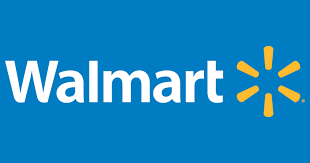


**Note: I have addressed only questions mentioned in the pdf named Walmart Data Exploration Business Case solution Approach**

**Some plots might not get completely printed on the pdf hence providing google colab link.**

----

https://colab.research.google.com/drive/18z7cXdpq5WuASlpIcFVbX9kcH-VeHJd1?usp=sharing

#Business Problem

● Walmart is an American multinational retail corporation that operates a chain of
supercenters, discount departmental stores, and grocery stores in the United States.
Walmart has more than 100 million customers worldwide.

● The Management team at Walmart Inc. wants to analyze the customer purchase
behavior (precisely, purchase amount) against the customer’s gender and the various
other factors to help the business make better decisions. They want to understand if the
spending habits differ between male and female customers: Do women spend more on
Black Friday than men?

**The data includes the following variables:**
1. **User_ID:** User ID
2. **Product_ID:** Product ID
3. **Gender:** Sex of User
4. **Age:** Age in bins
5. **Occupation:**Occupation
6.**City_Category:** Category of the City (A,B,C)
7. **StayInCurrentCityYears:** Number of years stay in current city
8. **Marital_Status:** Marital Status
9. **ProductCategory:** Product Category
10. **Purchase:** Purchase Amount

# **1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset**

In [ ]:
# Importing necessary libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Loading the walmart data

!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
To: /content/walmart_data.csv?1641285094
100% 23.0M/23.0M [00:02<00:00, 9.49MB/s]


In [ ]:
# Assuming 'data' is your DataFrame

wm = pd.read_csv("walmart_data.csv?1641285094")

#Overview of head and tail combined of the walmart dataframe

wm

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
# Get a concise summary of the DataFrame

wm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


 *Insights*

---

The Walmart dataset comprises 10 columns, with 5 columns being categorical and 5 columns being numerical. While no columns showing null values.

In [ ]:
#Check the null values

print('\nColumns with missing value:')
print(wm.isnull().any())


Columns with missing value:
User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category              False
Purchase                      False
dtype: bool


 *Insights*

---

No columns showing null values.

In [ ]:
# Display the first few rows of the DataFrame

wm.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
# Number of columns

wm.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
# Check the shape of the DataFrame

wm.shape

(550068, 10)

In [ ]:
#Check the dimensions of the DataFrame

wm.ndim

2

 **Insights*

---

The Walmart dataset is 2 dimensional with 550068 enteries and 10 descriptions.

Converting numerical datatype to categorical datatype, i.e changing the datatype of Occupation, Marital Status and Product Category.

In [ ]:
#Changing datatype int64 to object
cols=["Occupation", "Marital_Status","Product_Category"]
wm[cols]=wm[cols].astype("object")
wm.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category              object
Purchase                       int64
dtype: object

In [ ]:
# Summary statistics for numerical columns

wm.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.0,550068,550068,550068.0,550068.0,550068.000000
unique,NaN,3631,2,7,21.0,3,5,2.0,20.0,NaN
top,NaN,P00265242,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,NaN,1880,414259,219587,72308.0,231173,193821,324731.0,150933.0,NaN
mean,1.003029e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,1.727592e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,1.000001e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,1.001516e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


 **Insights*

---

1) The top people purchasing are in the age range of 26–35.

2) Males are top in purchasing.

3) The average purchase is 9263.96 and the maximum purchase is 23961, so the average value is sensitive to outliers, but the fact that the mean is so small compared to the maximum value indicates the maximum value is an outlier.

4)The top city category purchasing is Category B

# Non-Graphical Analysis: Value counts and unique attributes

**Value counts**

1. Gender
2. Age
3. Occupation
4. City_Category
5. Stay_In_Current_City_Years
6. Marital_Status
7. Product_Category

In [ ]:
#Value counts for gender

gender_count = wm["Gender"].value_counts()
percentage_gender = round(gender_count/len(wm)*100,2)
print(f"Gender count: \n {gender_count} \n Percentage {percentage_gender}")

Gender count: 
 Gender
M    414259
F    135809
Name: count, dtype: int64 
 Percentage Gender
M    75.31
F    24.69
Name: count, dtype: float64


In [ ]:
#Value counts for Age

age_count = wm["Age"].value_counts()
percentage_age = round((age_count/len(wm))*100,2)
print(f"Age count: \n {age_count} \n Percentage {percentage_age}")

Age count: 
 Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64 
 Percentage Age
26-35    39.92
36-45    20.00
18-25    18.12
46-50     8.31
51-55     7.00
55+       3.91
0-17      2.75
Name: count, dtype: float64


In [ ]:
#Value counts for Marital Status

ms_count = wm["Marital_Status"].value_counts()
percentage_ms = round(ms_count/len(wm)*100,2)
print(f"Marital status count: \n {ms_count} \n Percentage {percentage_ms}")

Marital status count: 
 Marital_Status
0    324731
1    225337
Name: count, dtype: int64 
 Percentage Marital_Status
0    59.03
1    40.97
Name: count, dtype: float64


In [ ]:
#Value counts for Occupation

occ_count = wm["Occupation"].value_counts()
percentage_occ = round(occ_count/len(wm)*100,2)
print(f"Occupation count: \n {occ_count} \n Percentage {percentage_occ}")

Occupation count: 
 Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64 
 Percentage Occupation
4     13.15
0     12.66
7     10.75
1      8.62
17     7.28
20     6.10
12     5.67
14     4.96
2      4.83
16     4.61
6      3.70
3      3.21
10     2.35
5      2.21
15     2.21
11     2.11
19     1.54
13     1.40
18     1.20
9      1.14
8      0.28
Name: count, dtype: float64


In [ ]:
#Value counts for City_Category

city_count = wm["City_Category"].value_counts()
percentage_city = round(city_count/len(wm)*100,2)
print(f"City Category count: \n {city_count} \n Percentage {percentage_city}")

City Category count: 
 City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64 
 Percentage City_Category
B    42.03
C    31.12
A    26.85
Name: count, dtype: float64


In [ ]:
#Value counts for Stay_In_Current_City_Years

stay_count = wm["Stay_In_Current_City_Years"].value_counts()
percentage_stay = round(stay_count/len(wm)*100,2)
print(f"Stay In current city count: \n {stay_count} \n Percentage {percentage_stay}")

Stay In current city count: 
 Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64 
 Percentage Stay_In_Current_City_Years
1     35.24
2     18.51
3     17.32
4+    15.40
0     13.53
Name: count, dtype: float64


In [ ]:
#Value counts for Product_Category

Product_count = wm["Product_Category"].value_counts()
percentage_product = round(Product_count/len(wm)*100,2)
print(f"Product Category count: \n {Product_count} \n Percentage {percentage_product}")

Product Category count: 
 Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64 
 Percentage Product_Category
5     27.44
1     25.52
8     20.71
11     4.42
2      4.34
6      3.72
3      3.67
4      2.14
16     1.79
15     1.14
13     1.01
10     0.93
12     0.72
7      0.68
18     0.57
20     0.46
19     0.29
14     0.28
17     0.11
9      0.07
Name: count, dtype: float64


 **Insights*

---

1) 75% of users are male and 25% are female.

2) Users ages 26–35 are 40%, users ages 36–45 are 20%, users ages 18–25 are 18%,
   and very low users ages ( 0–17 & 55+ )are 5%.

3) 35% stay in a city for 1 year, 18% stay in a city for 2 years, 17% stay in a city for 3 years,and 15% stay in a city for 4+ years.



**Unique attributes**

1. User_ID
2. Product_ID
3. Gender
4. Age
5. Occupation
6. City_Category
7. StayInCurrentCityYears
8. Marital_Status
9. ProductCategory
10. Purchase

In [ ]:
#names of columns
wm.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:

# Checking the uniques values of the column and its unique counts

for i in wm.columns:
  print("*The unique values in",i, "column are :")
  print(wm[i].unique())
  print(f"*Count of unique values : \n {wm[i].nunique()}")
  print("-"*70)

*The unique values in User_ID column are :
[1000001 1000002 1000003 ... 1004113 1005391 1001529]
*Count of unique values : 
 5891
----------------------------------------------------------------------
*The unique values in Product_ID column are :
['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
*Count of unique values : 
 3631
----------------------------------------------------------------------
*The unique values in Gender column are :
['F' 'M']
*Count of unique values : 
 2
----------------------------------------------------------------------
*The unique values in Age column are :
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
*Count of unique values : 
 7
----------------------------------------------------------------------
*The unique values in Occupation column are :
[10 16 15 7 20 9 1 12 17 0 3 4 11 8 19 2 18 5 14 13 6]
*Count of unique values : 
 21
----------------------------------------------------------------------
*The unique values 

 **Insights*

---

1) The total product category count is 20 unique products.

2) The total number of unique city categories is three.

3) The total number of unique product IDs is 3631.

4) The total number of unique user IDs is 5891







# **2. Detect Null values and outliers**


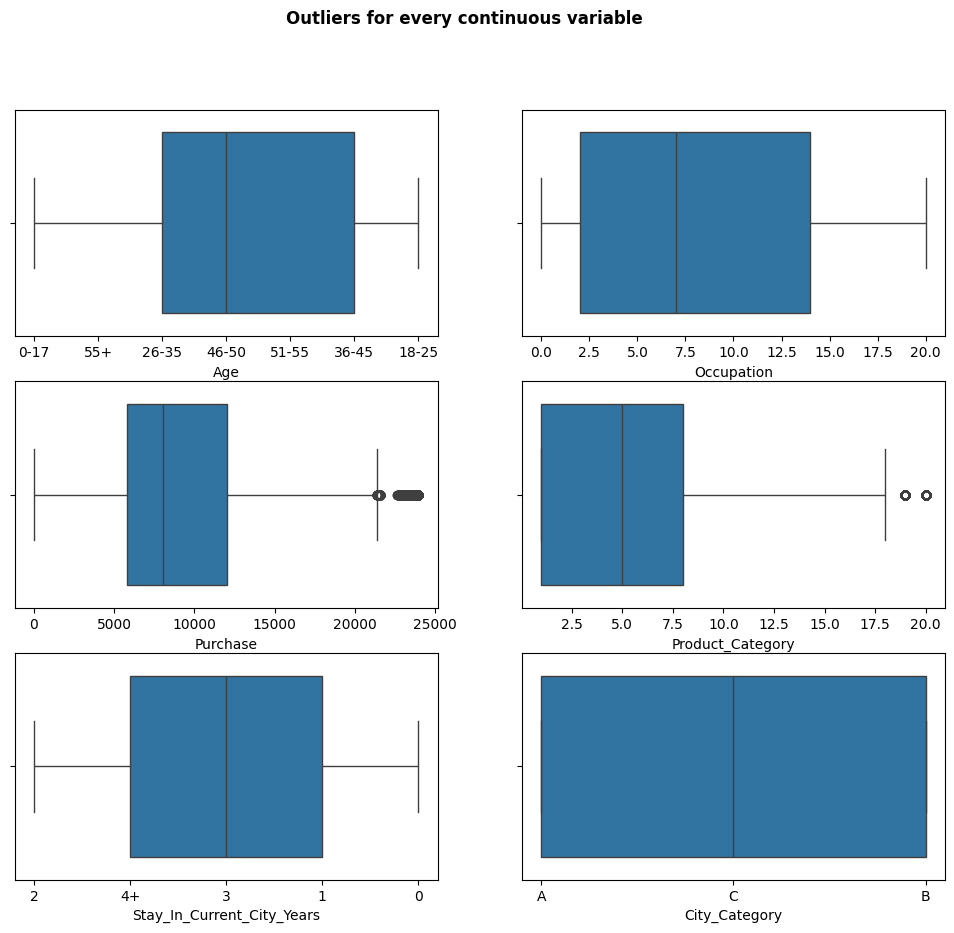

In [ ]:
#plot outliers

fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.suptitle("Outliers for every continuous variable", weight='bold')
#fig.subplots_adjust(top=1)

sns.boxplot(data=wm, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=wm, x="Occupation", orient='h', ax=axis[0,1])
sns.boxplot(data=wm, x="Purchase", orient='h', ax=axis[1,0])
sns.boxplot(data=wm, x="Product_Category", orient='h', ax=axis[1,1])
sns.boxplot(data=wm, x="Stay_In_Current_City_Years", orient='h', ax=axis[2,0])
sns.boxplot(data=wm, x="City_Category", orient='h', ax=axis[2,1])
plt.show()

 **Insights*

---
1) Only Product category and Purchase columns has outliers.

In [ ]:
# Replace 'continuous_cols' with the names of your continuous variables
continuous_cols = ['Purchase']

# Step 3: Calculate the 5th and 95th percentiles for each column
percentiles = wm[continuous_cols].quantile([0.05, 0.95])

# Step 4: Clip the data to remove outliers
for col in continuous_cols:
    lower_bound = percentiles.loc[0.05, col]
    upper_bound = percentiles.loc[0.95, col]

    # Clip values outside the 5th and 95th percentiles
    wm[col] = np.clip(wm[col], lower_bound, upper_bound)

# Now data contains the clipped data where outliers are removed

In [ ]:
continuous_cols
percentiles

,Purchase
0.05,1984.0
0.95,19336.0


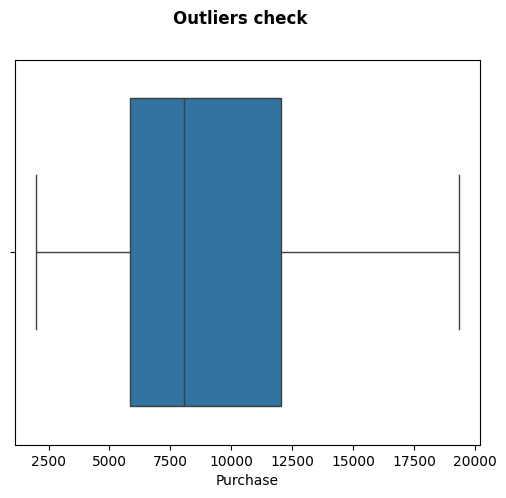

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))
fig.suptitle("Outliers check", weight='bold')
sns.boxplot(data=wm, x="Purchase", orient='h', ax=axis)
plt.show()

#Understanding the distribution of data for the categorical variables

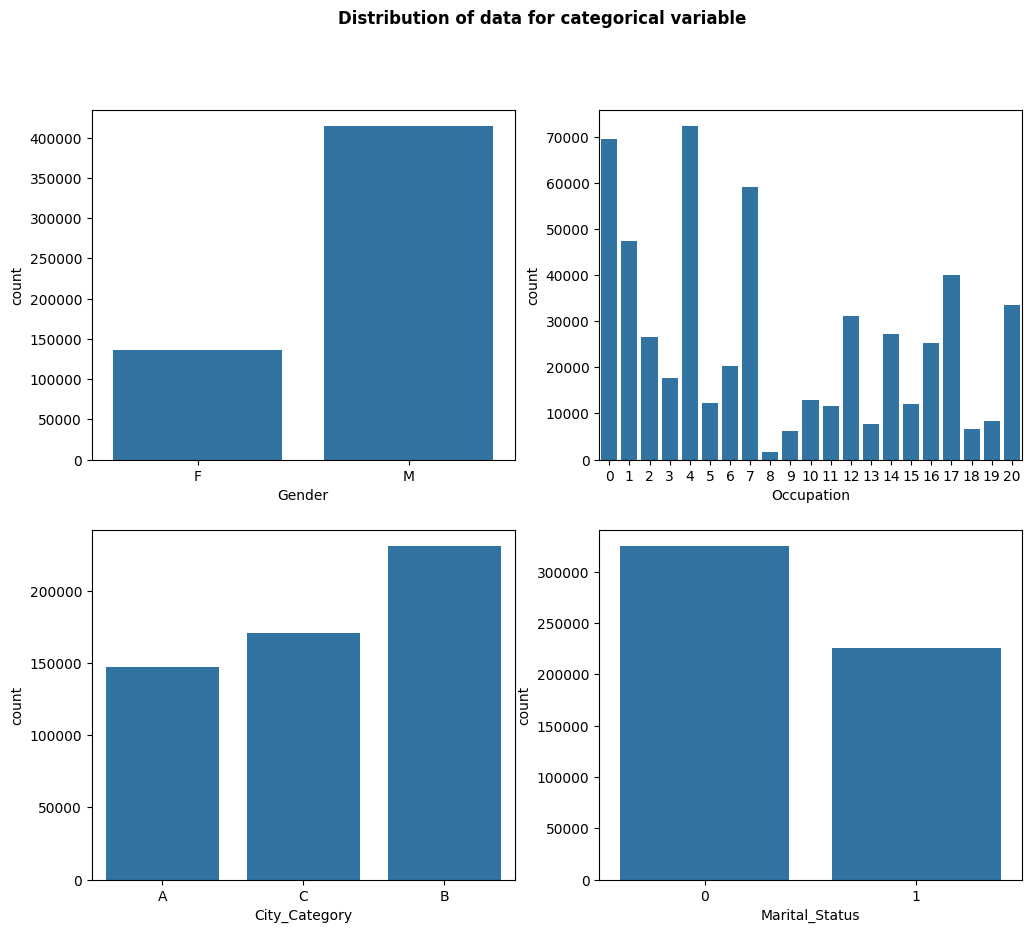

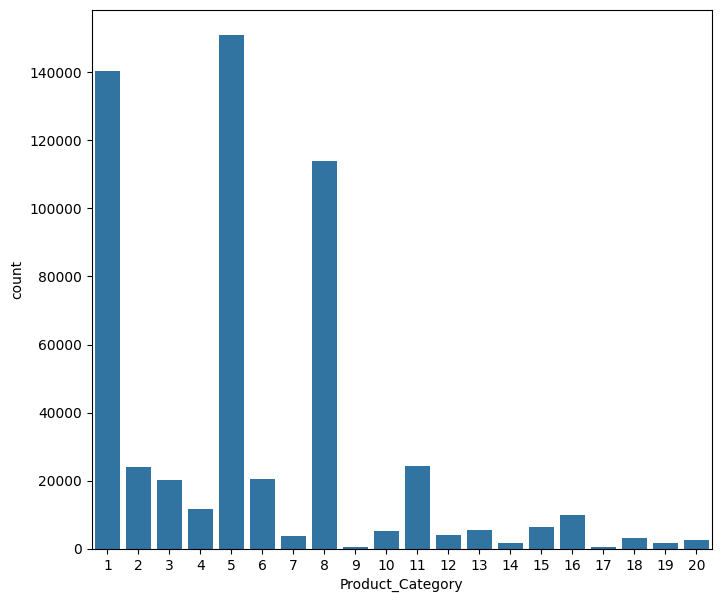

In [ ]:
#Understanding the distribution of data for the categorical variables

categorical_cols = ['Gender', 'Occupation','City_Category','Marital_Status','Product_Category']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle("Distribution of data for categorical variable", weight='bold')
sns.countplot(data=wm, x='Gender', ax=axs[0,0])
sns.countplot(data=wm, x='Occupation', ax=axs[0,1])
sns.countplot(data=wm, x='City_Category', ax=axs[1,0])
sns.countplot(data=wm, x='Marital_Status', ax=axs[1,1])
plt.show()
plt.figure(figsize=(8, 7))
sns.countplot(data=wm, x='Product_Category')
plt.show()

 **Insights*

---
1)Most of the users are Male.

2)There are 20 different types of Occupation and Product_Category.

3)More users belong to B City_Category.

4)More users are Single as compare to Married.

5)Product_Category - 1, 5, 8, & 11 have highest purchasing frequency.

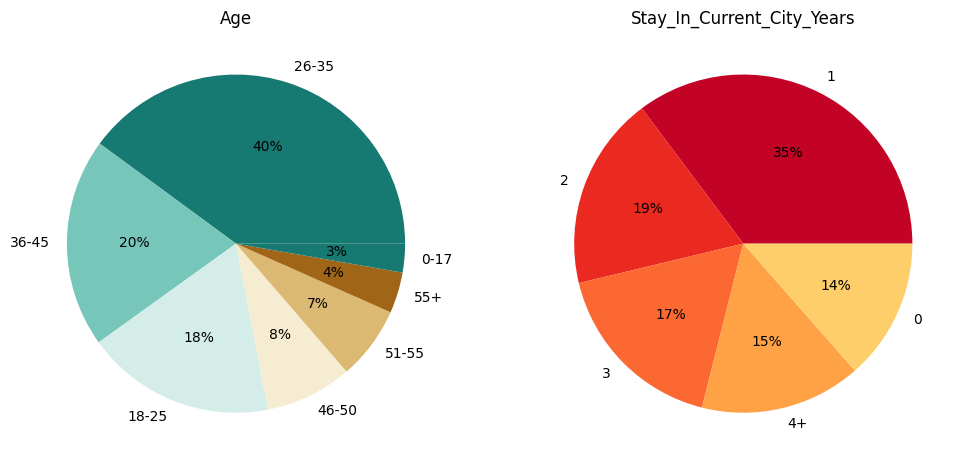

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
# Calculate age counts and store in a new variable
age_counts = wm["Age"].value_counts(normalize=True)*100
palette_color = sns.color_palette('BrBG_r')
axs[0].pie(x=age_counts.values, labels=age_counts.index, autopct='%.0f%%',
colors=palette_color)
axs[0].set_title("Age")


# Calculate stay duration counts directly from the original DataFrame
stay_counts = wm['Stay_In_Current_City_Years'].value_counts(normalize=True)*100
palette_color = sns.color_palette('YlOrRd_r')
axs[1].pie(x=stay_counts.values, labels=stay_counts.index, autopct='%.0f%%',
colors=palette_color)
axs[1].set_title("Stay_In_Current_City_Years")

plt.show()


 **Insights*

---
1)Users ages 26–35 are 40%, users ages 36–45 are 20%, users ages 18–25 are 18%, users ages 46–50 are 8%,users ages 51–55 are 7%, users ages 55+ are 4%, and very low users ages 0–17 are 2%.

2) 35% stay in a city for 1 year, 19% stay in a city for 2 years, 17% stay in a city for 3 years,and 15% stay in a city for 4+ years.

# **3. Data Exploration**

## a. What products are different age groups buying?

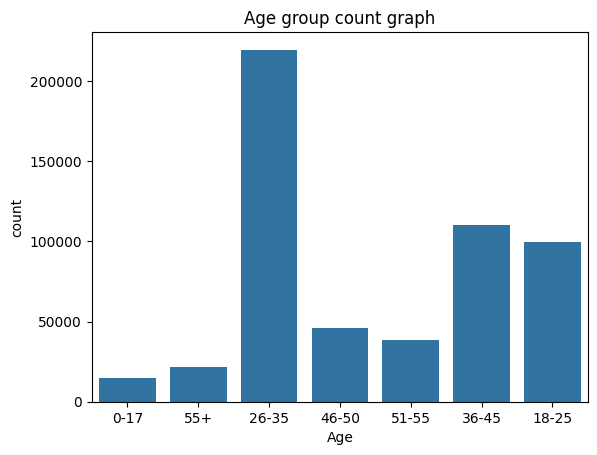

In [ ]:
sns.countplot(data = wm, x= 'Age')
plt.title('Age group count graph')
plt.show()

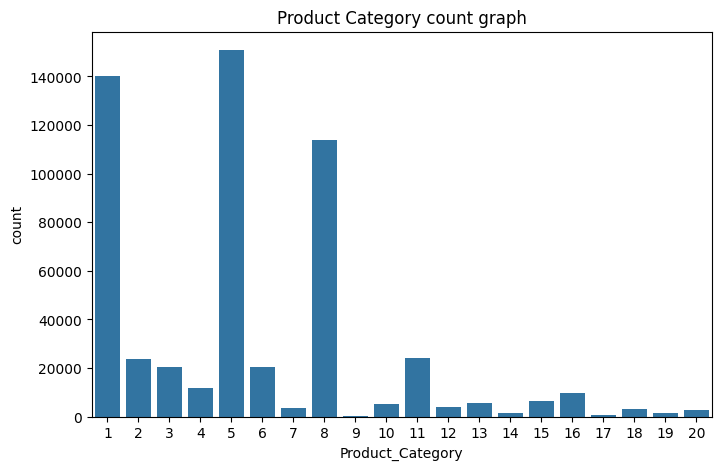

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data =wm,x = 'Product_Category')
plt.title('Product Category count graph')
plt.show()


In [ ]:
pd.crosstab(index=wm['Age'],columns= wm['Product_Category'])

Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Age,,,,,,,,,,,,,,,,,,,,
0-17,3585,805,1200,758,4330,399,53,2258,16,111,740,125,112,39,160,229,6,27,59,90
18-25,26962,4428,4710,2463,28522,3749,481,17911,63,603,4597,439,756,230,1024,1598,41,339,275,469
26-35,58249,8928,7662,4192,61473,8485,1651,44256,154,1787,9874,1096,2096,564,2372,4118,127,1042,563,898
36-45,27648,4912,3854,2354,29377,3899,809,23296,107,1235,4953,994,1250,312,1395,1955,135,702,320,506
46-50,10474,2105,1376,990,11971,1622,327,10656,33,520,2104,520,551,149,602,879,95,351,149,227
51-55,9049,1781,924,678,9893,1450,266,9340,29,519,1458,433,483,154,508,672,107,423,134,200
55+,4411,905,487,318,5367,862,134,6208,8,350,561,340,301,75,229,377,67,241,103,160


 **Insights*

---
From the above graphs, we can conclude that Product_Category = 5 is purchased the most &
Age group 26-35 have purchased the most.

## b. Is there a relationship between age, marital status, and the amount spent?

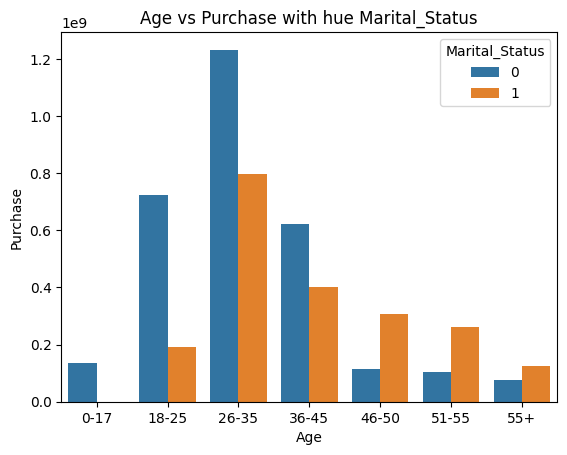

In [ ]:
data = wm.groupby(['Age','Marital_Status'])['Purchase'].sum().reset_index()
sns.barplot(data=data,x='Age',y='Purchase',hue='Marital_Status')
plt.title('Age vs Purchase with hue Marital_Status')
plt.show()

 **Insights*

---
1) The purchase score in 0-17 age of married is 0 because till the age of 17 no one is married.

2) The age 26-35 marital_Status 0 purchsed the most.

3)The age 55+ marital_Status 0 purchased the least amount products because only few people left unmarried till the age of 55.

## c. Are there preferred product categories for different genders?

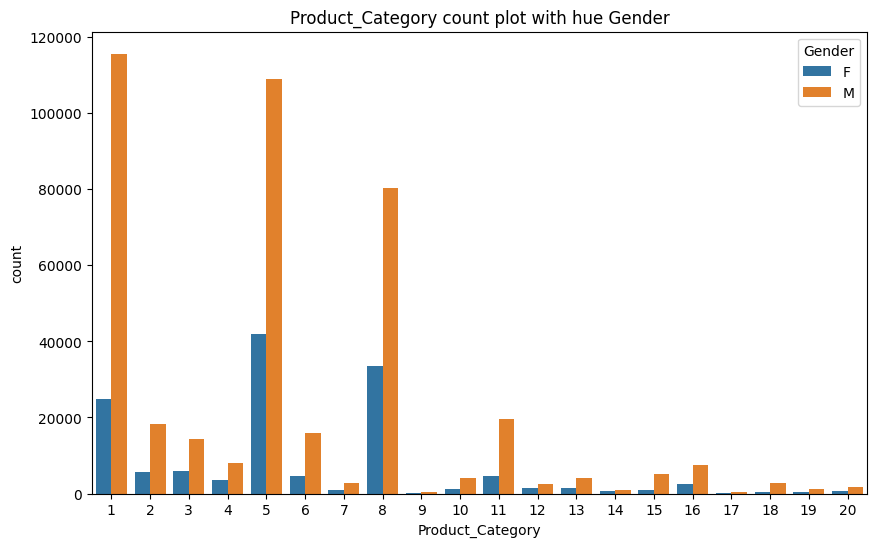

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data = wm, x = 'Product_Category',hue ='Gender')
plt.title('Product_Category count plot with hue Gender')
plt.show()

In [ ]:
pd.crosstab(index=wm['Gender'],columns= wm['Product_Category'])

Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Gender,,,,,,,,,,,,,,,,,,,,
F,24831,5658,6006,3639,41961,4559,943,33558,70,1162,4739,1532,1462,623,1046,2402,62,382,451,723
M,115547,18206,14207,8114,108972,15907,2778,80367,340,3963,19548,2415,4087,900,5244,7426,516,2743,1152,1827


 **Insights*

---

1)For males, product categories 1 and 5 are the most favored.

2)For females, product categories 5 and 8 are the most popular.

# **4. How does gender affect the amount spent?**

1)Is the conﬁdence interval computed using the entire dataset wider for
one of the genders? Why is this the case?

2) How is the width of the conﬁdence interval affected by the sample size?

3) Do the conﬁdence intervals for different sample sizes overlap?

4) How does the sample size affect the shape of the distributions of the
means?

In [ ]:
amt_df = wm.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


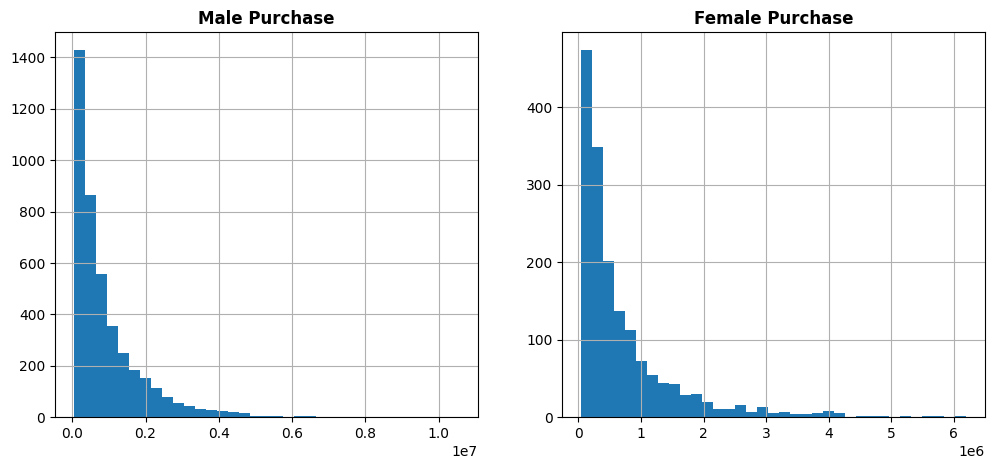

In [ ]:
# histogram of average amount spend for each customer - Male & Female
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
amt_df[amt_df['Gender']=='M']['Purchase'].hist(bins=35, ax=ax[0])
ax[0].set_title("Male Purchase", weight='bold')

amt_df[amt_df['Gender']=='F']['Purchase'].hist(bins=35, ax=ax[1])
ax[1].set_title("Female Purchase", weight='bold')
plt.show()

In [ ]:
male_avg = amt_df[amt_df['Gender']=='M']['Purchase'].mean()
female_avg = amt_df[amt_df['Gender']=='F']['Purchase'].mean()

print("Average amount spend by Male customers:{:.2f}".format(male_avg))
print("Average amount spend by Female customers:{:.2f}".format(female_avg))

Average amount spend by Male customers:925344.40
Average amount spend by Female customers:712024.39


 **Insights*

---
Male customers spend more money than female customers

# **Confidence intervals and distribution of the mean of the expenses by female and male customers**


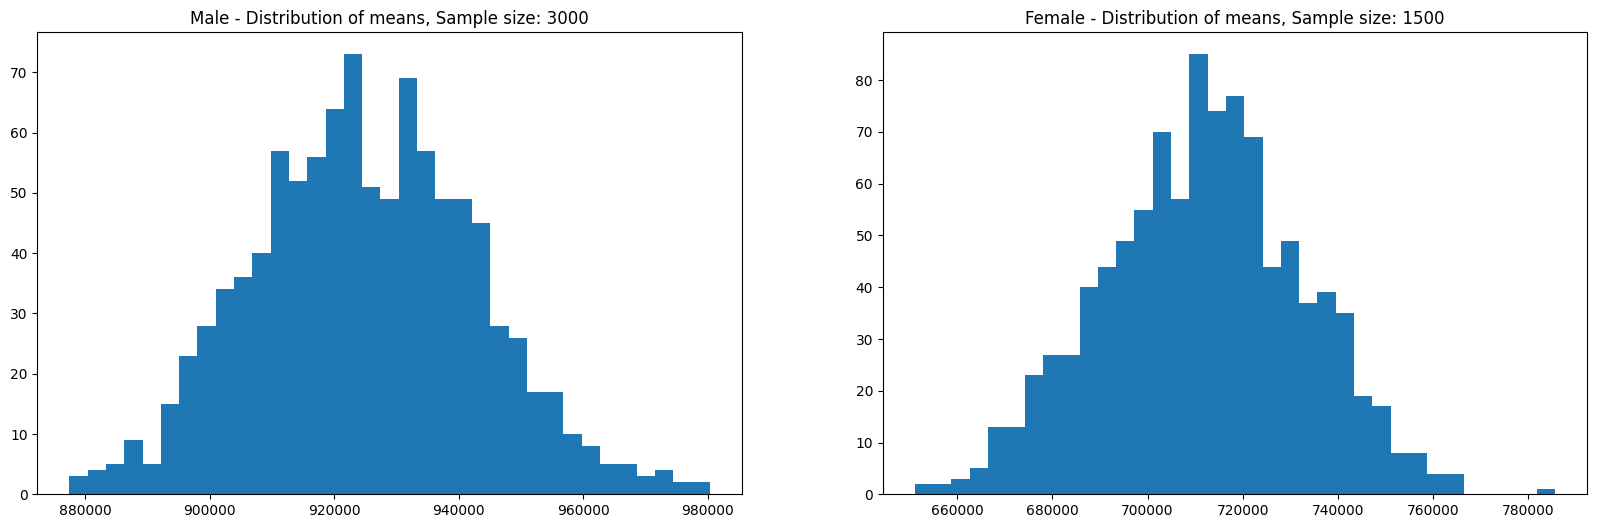

In [ ]:
male_df = amt_df[amt_df['Gender']=='M']
female_df = amt_df[amt_df['Gender']=='F']
genders = ["M", "F"]

male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size,
replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size,
replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)
#######################################################################
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].set_title("Female - Distribution of means, Sample size: 1500")

plt.show()

In [ ]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std:{:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std:{:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

Population mean - Mean of sample means of amount spend for Male: 925074.24
Population mean - Mean of sample means of amount spend for Female: 711559.92

Male - Sample mean: 925344.40 Sample std:985830.10
Female - Sample mean: 712024.39 Sample std:807370.73


 **Insights*

---
Now using the Central Limit Theorem for the population we can say that:
1. Average amount spend by male customers is 9,26,341.86
2. Average amount spend by female customers is 7,11,704.09

### 3: Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

In [ ]:
male_margin_of_error_clt = 1.96*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.96*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (895617.83, 955070.97)
Female confidence interval of means: (673254.77, 750794.02)


 **Insights*

---
Now we can infer about the population that, 95% of the times:
1. Average amount spend by male customer will lie in between: (895617.83, 955070.97)
2. Average amount spend by female customer will lie in between: (673254.77, 750794.02)

# **5. How does Marital_Status affect the amount spent?**



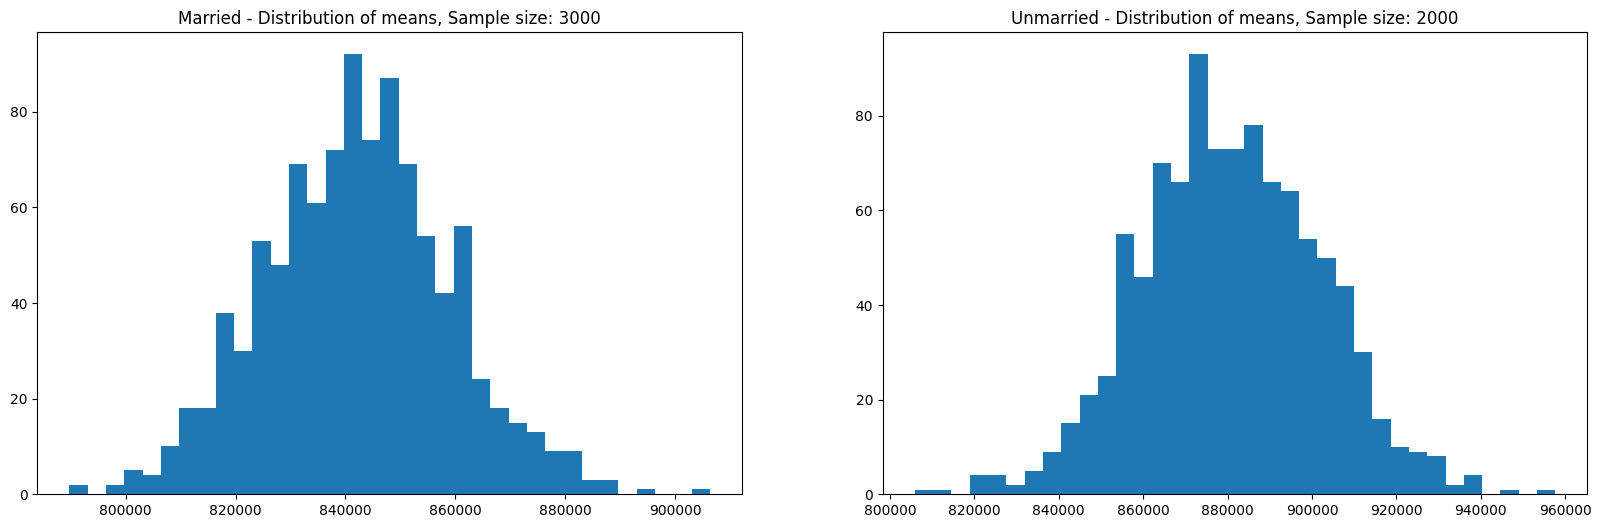

Population mean - Mean of sample means of amount spend for Married: 842147.43
Population mean - Mean of sample means of amount spend for Unmarried: 880706.14

Married - Sample mean: 843526.80 Sample std: 935352.12
Unmarried - Sample mean: 880575.78 Sample std: 949436.25
Unmarried confidence interval of means: (848741.18, 912410.38)


In [ ]:
amt_df = wm.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df
amt_df['Marital_Status'].value_counts()
marid_samp_size = 3000
unmarid_sample_size = 2000
num_repitions = 1000
marid_means = []
unmarid_means = []

for _ in range(num_repitions):
    marid_mean = amt_df[amt_df['Marital_Status']==1].sample(marid_samp_size, replace=True)['Purchase'].mean()
    unmarid_mean = amt_df[amt_df['Marital_Status']==0].sample(unmarid_sample_size, replace=True)['Purchase'].mean()

    marid_means.append(marid_mean)
    unmarid_means.append(unmarid_mean)


fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")

plt.show()

print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))

print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==1]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==0]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==0]['Purchase'].std()))

for val in ["Married", "Unmarried"]:

    new_val = 1 if val == "Married" else 0

    new_df = amt_df[amt_df['Marital_Status']==new_val]

    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt
print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

#**6. How does Age affect the amount spent?**

In [ ]:
amt_df = wm.groupby(['User_ID', 'Age'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df
amt_df['Age'].value_counts()
sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+','0-17']
for age_interval in age_intervals:
    all_means[age_interval] = []

for age_interval in age_intervals:
    for _ in range(num_repitions):
        mean = amt_df[amt_df['Age']==age_interval].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[age_interval].append(mean)
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '017']:
     new_df = amt_df[amt_df['Age']==val]
     margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
     sample_mean = new_df['Purchase'].mean()
     lower_lim = sample_mean - margin_of_error_clt
     upper_lim = sample_mean + margin_of_error_clt

print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 017 --> confidence interval of means: (nan, nan)


**1) Is the confidence interval computed using the entire dataset wider for one of the genders? Why is this the case?**

-The width of the confidence interval depends on the variability of the data and the sample size. If one gender has more variability in spending, its confidence interval will be wider.

**2) How is the width of the confidence interval affected by the sample size?**

-As the sample size increases, the standard error decreases, leading to narrower confidence intervals. This is because larger samples provide more accurate estimates of the population mean.

**3)Do the confidence intervals for different sample sizes overlap?**

-This can be checked by comparing the confidence intervals calculated for different sample sizes. Overlapping intervals suggest that the means are not significantly different across these samples.

**4)How does the sample size affect the shape of the distributions of the means**

-With smaller sample sizes, the distribution of the means may be more spread out and less symmetric. As the sample size increases, the distribution of the sample means tends to become more normal (Gaussian) due to the Central Limit Theorem.

# **7. Create a report**

# a. Report whether the conﬁdence intervals for the average amount spent by males and females (computed using all the data) overlap. How can Walmart leverage this conclusion to make changes or improvements?

Central Limit Theorom

In [ ]:
def bootstrap(sample1,sample2,sample_size,itr_size=1000,ci=95):
    ci = ci/100

    plt.figure(figsize=(16,8))
    sample1_n = [np.mean(sample1.sample(sample_size)) for i in range(itr_size)]
    sample2_n = [np.mean(sample2.sample(sample_size)) for i in range(itr_size)]

    # For Sample1's means
    mean1 = np.mean(sample1_n)
    sigma1 = np.std(sample1_n)
    sem1 = stats.sem(sample1_n)

    lower_limit_1 = norm.ppf((1-ci)/2) * sigma1 + mean1
    upper_limit_1 = norm.ppf(ci+(1-ci)/2) * sigma1 + mean1

    # For Sample2's means
    mean2 = np.mean(sample2_n)
    sigma2 = np.std(sample2_n)
    sem2 = stats.sem(sample2_n)

    lower_limit_2 = norm.ppf((1-ci)/2) * sigma2 + mean2
    upper_limit_2 = norm.ppf(ci + (1-ci)/2) * sigma2 + mean2

    sns.kdeplot(data = sample1_n, color="#F2D2BD", fill = True, linewidth = 2)
    label_mean1=("μ (Males) :  {:.2f}".format(mean1))
    plt.axvline(mean1, color = '#FF00FF', linestyle = 'solid', linewidth = 2, label=label_mean1)
    label_limits1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit_1,upper_limit_1))
    plt.axvline(lower_limit_1, color = '#FF69B4', linestyle = 'dashdot', linewidth = 2, label=label_limits1)
    plt.axvline(upper_limit_1, color = '#FF69B4', linestyle = 'dashdot', linewidth = 2)

    sns.kdeplot(data = sample2_n ,color='#ADD8E6', fill = True, linewidth = 2)
    label_mean2=("μ (Females):  {:.2f}".format(mean2))
    plt.axvline(mean2, color = '#1434A4', linestyle = 'solid', linewidth = 2, label=label_mean2)
    label_limits2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit_2,upper_limit_2))
    plt.axvline(lower_limit_2, color = '#4682B4', linestyle = 'dashdot', linewidth = 2, label=label_limits2)
    plt.axvline(upper_limit_2, color = '#4682B4', linestyle = 'dashdot', linewidth = 2)

    plt.title(f"Sample Size: {sample_size}, Male Avg: {np.round(mean1, 2)}, Male SME: {np.round(sem1,2)}, Female Avg:{np.round(mean2, 2)}, Female SME: {np.round(sem2,2)}")
    plt.legend(loc = 'upper right')
    plt.xlabel('Purchase')
    plt.ylabel('Density')


    return round(mean1,2), round(mean2,2), round(lower_limit_1,2), round(upper_limit_1,2), round(lower_limit_2,2), round(upper_limit_2,2)

In [ ]:
df_male = wm[wm['Gender']=='M']
df_female = wm[wm['Gender']=='F']

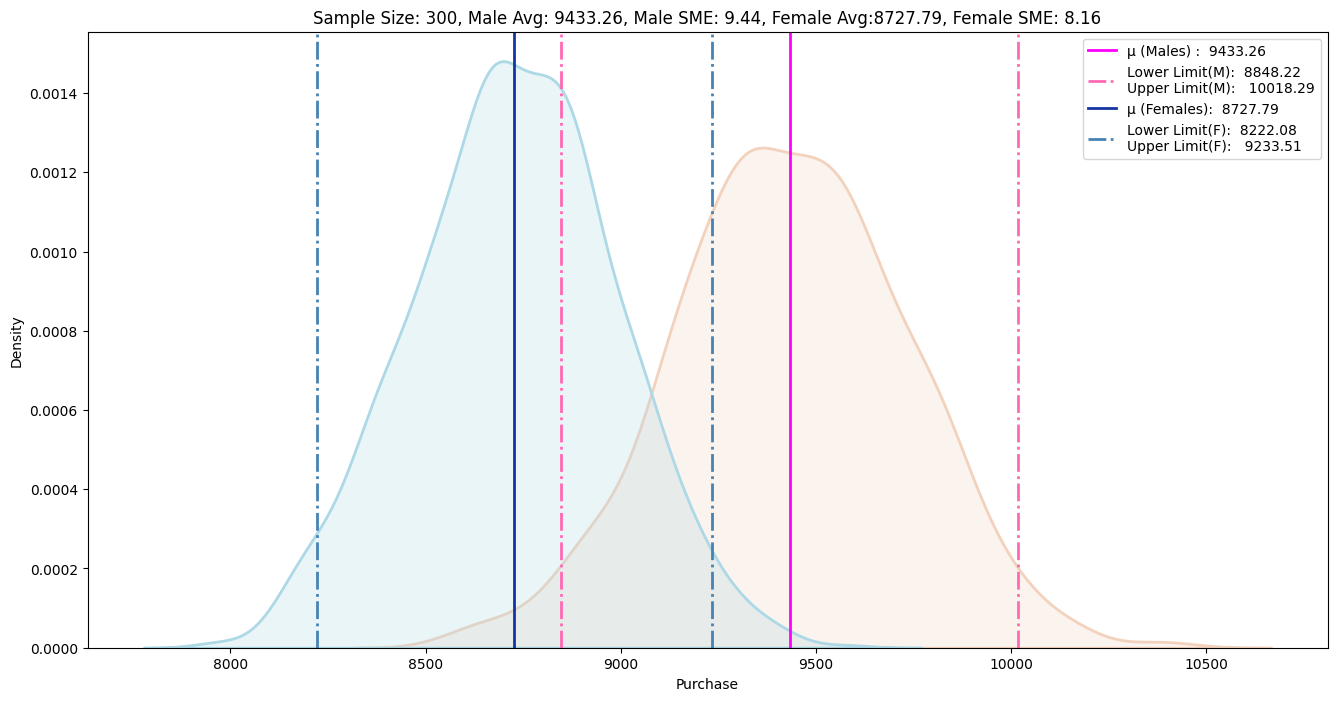

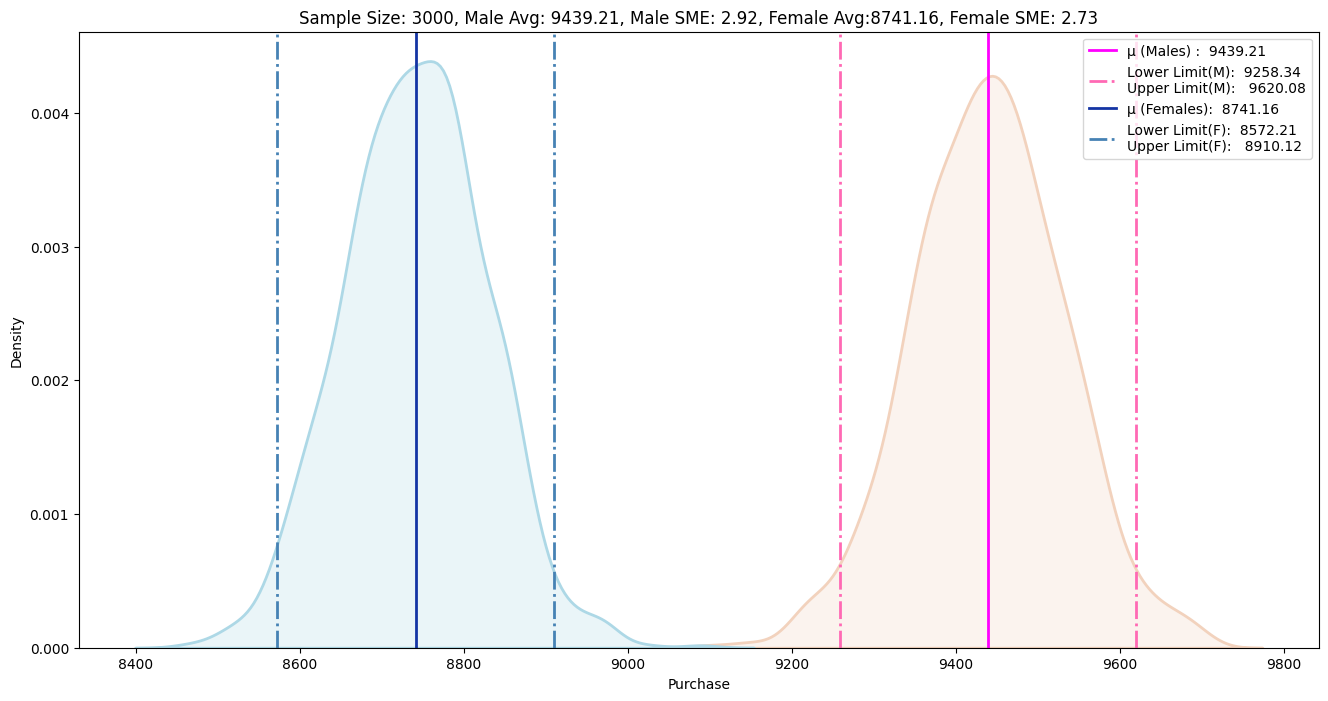

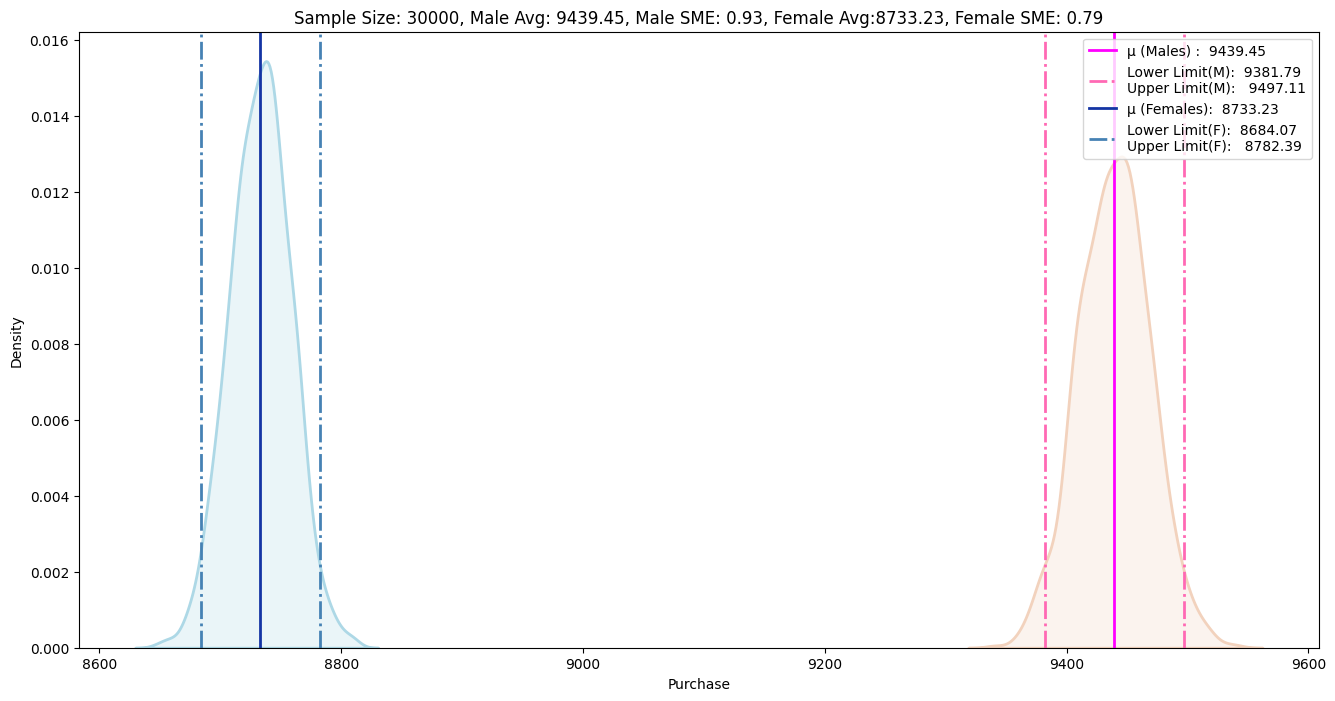

In [ ]:
sample_sizes = [300,3000,30000]
ci = 95
itr_size = 1000

res = pd.DataFrame(columns = ['Gender','Sample Size','Lower Limit','Upper Limit','Sample Mean','Confidence Interval','Interval Range','Range'])

for i in sample_sizes:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrap(df_male['Purchase'],df_female['Purchase'],i,itr_size,ci)

    res = pd.concat([res, pd.DataFrame({'Gender':'M','Sample Size':i,'Lower Limit':ll_m,'Upper Limit':ul_m,'Sample Mean':m_avg,'Confidence Interval':ci,'Interval Range':[ll_m,ul_m],'Range': ul_m-ll_m}, index=[0,1])], ignore_index=True) # Change the index to [0,1] to match the number of values
    res = pd.concat([res, pd.DataFrame({'Gender':'F','Sample Size':i,'Lower Limit':ll_f,'Upper Limit':ul_f,'Sample Mean':f_avg,'Confidence Interval':ci,'Interval Range':[ll_f,ul_f],'Range': ul_f-ll_f}, index=[0,1])], ignore_index=True) # Change the index to [0,1] to match the number of values



#b. Report whether the conﬁdence intervals for the average amount spent by married and unmarried (computed using all the data) overlap. How can Walmart leverage this conclusion to make changes or improvements?

In [ ]:
def bootstrap_m_vs_um(sample1,sample2,sample_size,itr_size=1000,ci=95):
    ci = ci/100

    plt.figure(figsize=(16,8))
    sample1_n = [np.mean(sample1.sample(sample_size)) for i in range(itr_size)]
    sample2_n = [np.mean(sample2.sample(sample_size)) for i in range(itr_size)]

    # For Sample1's means
    mean1 = np.mean(sample1_n)
    sigma1 = np.std(sample1_n)
    sem1 = stats.sem(sample1_n)

    lower_limit_1 = norm.ppf((1-ci)/2) * sigma1 + mean1
    upper_limit_1 = norm.ppf(ci+(1-ci)/2) * sigma1 + mean1

    # For Sample2's means
    mean2 = np.mean(sample2_n)
    sigma2 = np.std(sample2_n)
    sem2 = stats.sem(sample2_n)

    lower_limit_2 = norm.ppf((1-ci)/2) * sigma2 + mean2
    upper_limit_2 = norm.ppf(ci + (1-ci)/2) * sigma2 + mean2

    sns.kdeplot(data = sample1_n, color="#F2D2BD", fill = True, linewidth = 2)
    label_mean1=("μ (Married) :  {:.2f}".format(mean1))
    plt.axvline(mean1, color = '#FF00FF', linestyle = 'solid', linewidth = 2, label=label_mean1)
    label_limits1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit_1,upper_limit_1))
    plt.axvline(lower_limit_1, color = '#FF69B4', linestyle = 'dashdot', linewidth = 2, label=label_limits1)
    plt.axvline(upper_limit_1, color = '#FF69B4', linestyle = 'dashdot', linewidth = 2)

    sns.kdeplot(data = sample2_n ,color='#ADD8E6', fill = True, linewidth = 2)
    label_mean2=("μ (Unmarried):  {:.2f}".format(mean2))
    plt.axvline(mean2, color = '#1434A4', linestyle = 'solid', linewidth = 2, label=label_mean2)
    label_limits2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit_2,upper_limit_2))
    plt.axvline(lower_limit_2, color = '#4682B4', linestyle = 'dashdot', linewidth = 2, label=label_limits2)
    plt.axvline(upper_limit_2, color = '#4682B4', linestyle = 'dashdot', linewidth = 2)

    plt.title(f"Sample Size: {sample_size}, Married Avg: {np.round(mean1, 2)}, Married SME: {np.round(sem1,2)}, Unmarried Avg:{np.round(mean2, 2)}, Unmarried SME: {np.round(sem2,2)}")
    plt.legend(loc = 'upper right')
    plt.xlabel('Purchase')
    plt.ylabel('Density')

    return round(mean1,2), round(mean2,2), round(lower_limit_1,2), round(upper_limit_1,2), round(lower_limit_2,2), round(upper_limit_2,2)

In [ ]:
wm["Marital_Status"] = wm["Marital_Status"].replace(1, 'married')
wm["Marital_Status"]= wm["Marital_Status"].replace(0, 'unmarried')

In [ ]:
df_married = wm[wm['Marital_Status'] == 'married']['Purchase']
df_unmarried = wm[wm['Marital_Status'] == 'unmarried']['Purchase']


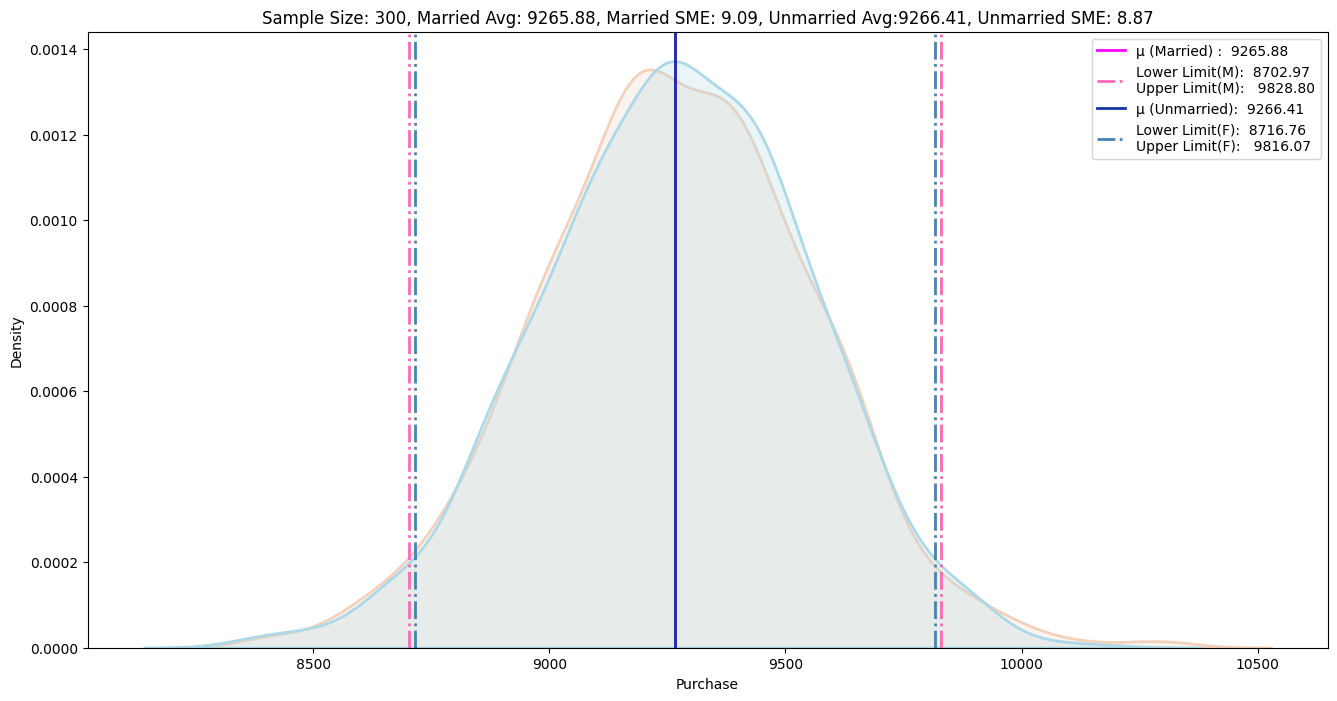

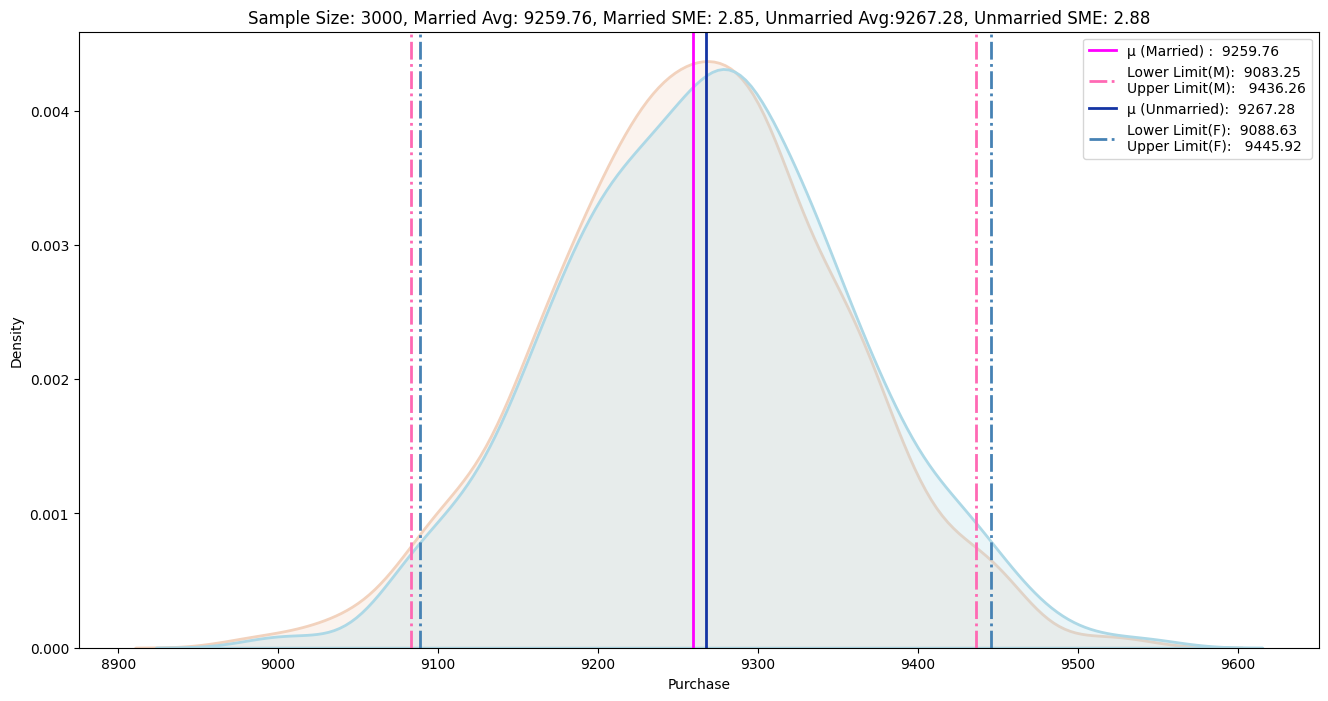

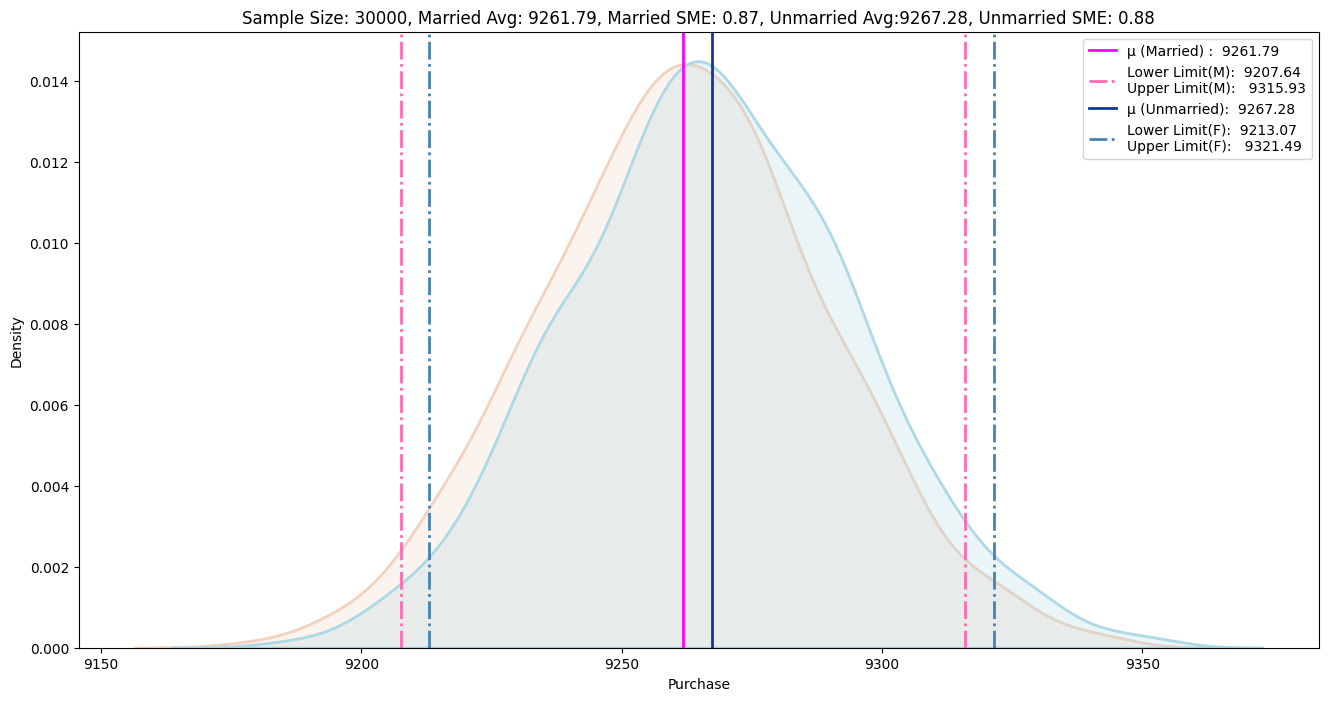

In [ ]:
sample_sizes = [300,3000,30000]
ci = 95
itr_size = 1000

res = pd.DataFrame(columns = ['Marital_Status','Sample Size','Lower Limit','Upper Limit','Sample Mean','Confidence Interval','Interval Range','Range'])

for i in sample_sizes:
    m_avg, un_avg, ll_m, ul_m, ll_un, ul_un = bootstrap_m_vs_um(df_married,df_unmarried,i,itr_size,ci)

    res = pd.concat([res, pd.DataFrame({'Marital_Status':'Unmarried','Sample Size':i,'Lower Limit':ll_un,'Upper Limit':ul_un,'Sample Mean':un_avg,'Confidence Interval':ci,'Interval Range':ll_un,'Range': ul_un-ll_un}, index=[0])], ignore_index=True)
    res = pd.concat([res, pd.DataFrame({'Marital_Status':'Unmarried','Sample Size':i,'Lower Limit':ll_un,'Upper Limit':ul_un,'Sample Mean':un_avg,'Confidence Interval':ci,'Interval Range':ul_un,'Range': ul_un-ll_un}, index=[1])], ignore_index=True)

# **C.Report whether the conﬁdence intervals for the average amount spent by different age groups (computed using all the data) overlap. How can Walmart leverage this conclusion to make changes or improvements?**

In [ ]:
def bootstrap_age(sample, sample_size, itr_size=1000, ci = 95):
    ci = ci/100

    global flag

    sample_n = [np.mean(sample.sample(sample_size)) for i in range(itr_size)]

    mean  = np.mean(sample_n)
    sigma = np.std(sample_n)
    sem   = stats.sem(sample_n)

    lower_limit = norm.ppf((1-ci)/2) * sigma + mean
    upper_limit = norm.ppf(ci + (1-ci)/2) * sigma + mean

    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")

    sns.kdeplot(data=sample_n,color="#7A68A6",fill=True,linewidth=2)

    label_mean=("μ :  {:.2f}".format(mean))
    label_ult=("Lower Limit:  {:.2f}\nUpper Limit:   {:.2f}".format(lower_limit,upper_limit))

    plt.title(f"Age Group: {Age_group[flag]}, Sample Size: {sample_size}, Mean:{np.round(mean,2)}, SME:{np.round(sem,2)}",fontsize=14,family="Comic Sans MS")
    plt.xlabel('Purchase')
    plt.axvline(mean, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean)
    plt.axvline(upper_limit, color = 'r', linestyle = 'dotted', linewidth = 2,label=label_ult)
    plt.axvline(lower_limit, color = 'r', linestyle = 'dotted', linewidth = 2)
    plt.legend(loc='upper right')

    plt.show()
    flag += 1

    return sample_n ,np.round(lower_limit,2),np.round(upper_limit,2), round(mean,2)



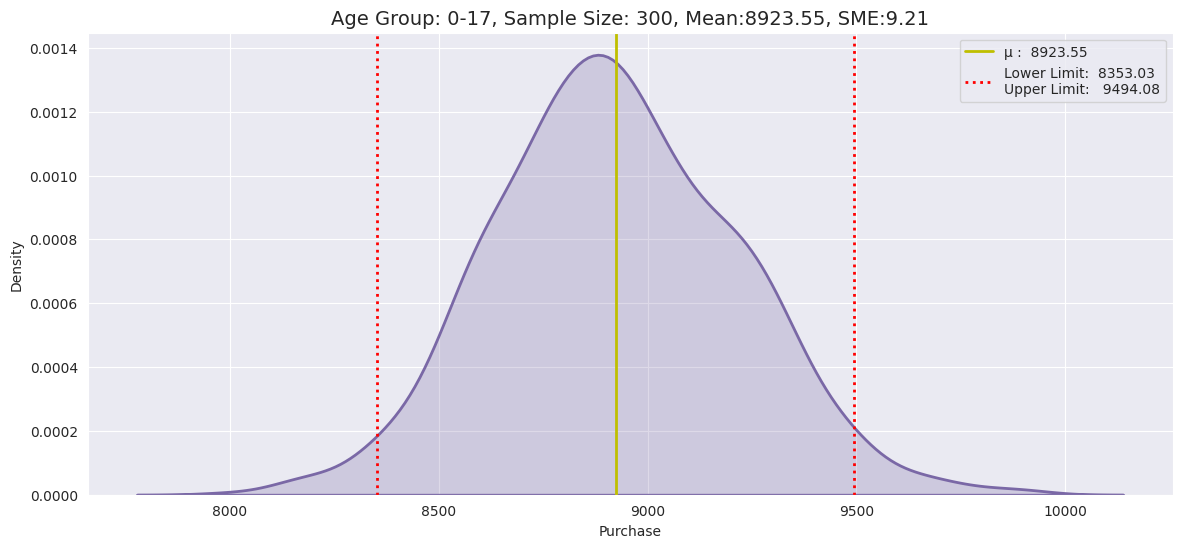

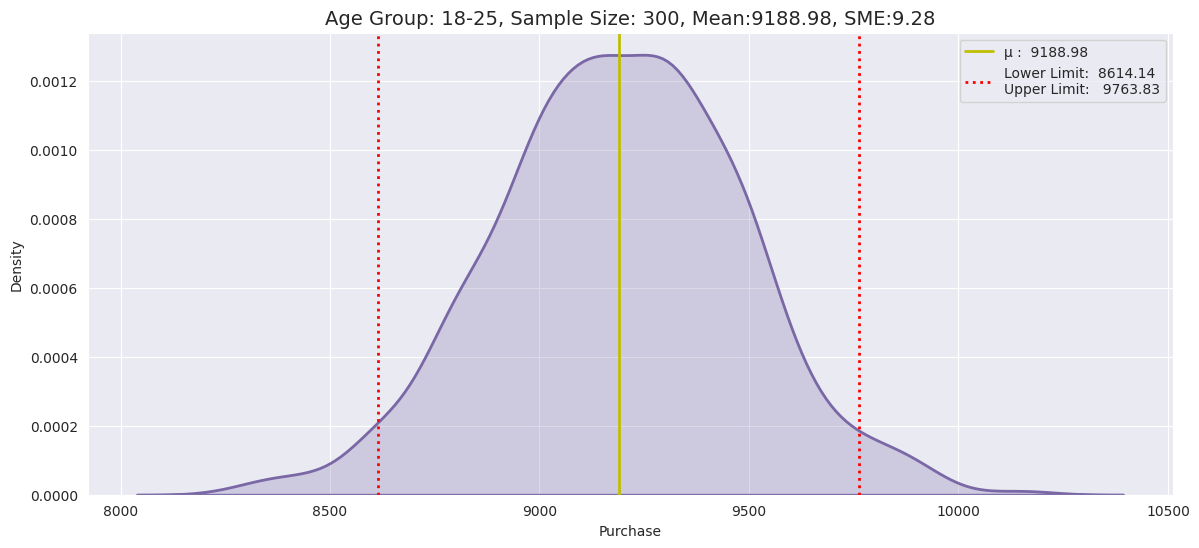

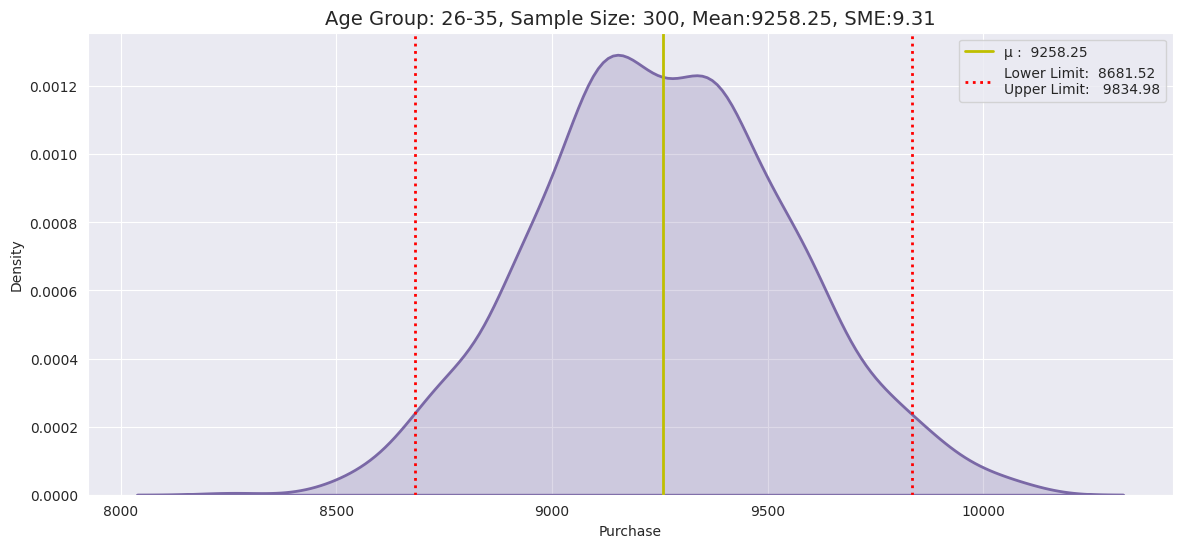

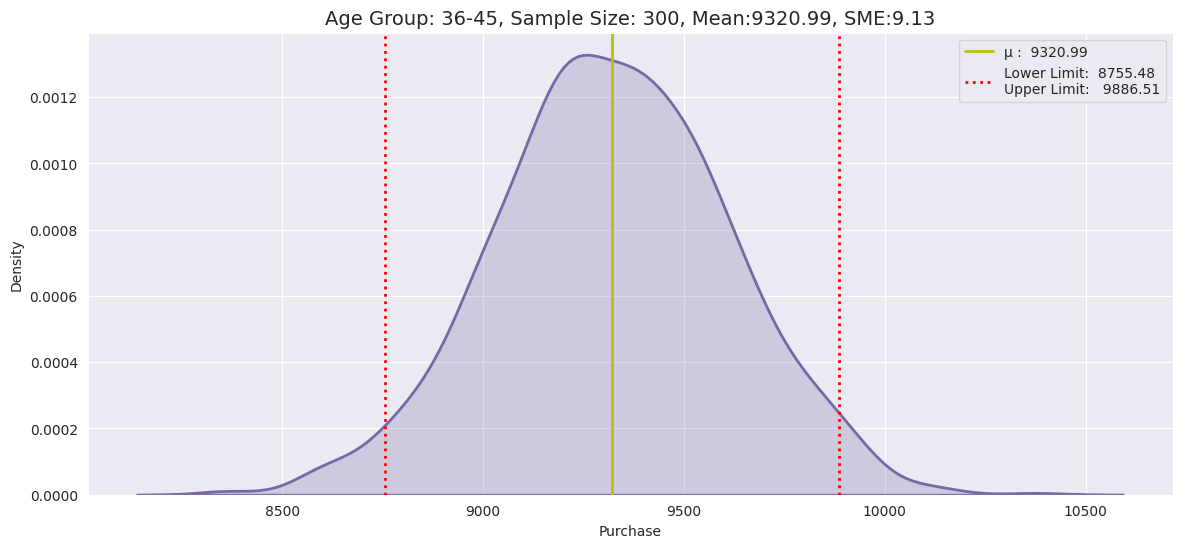

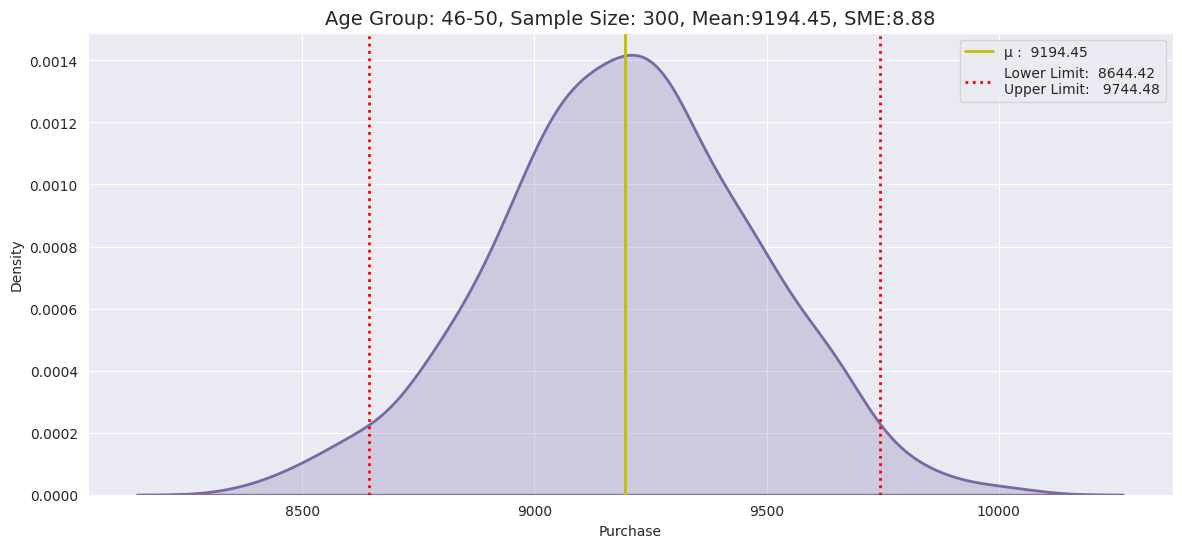

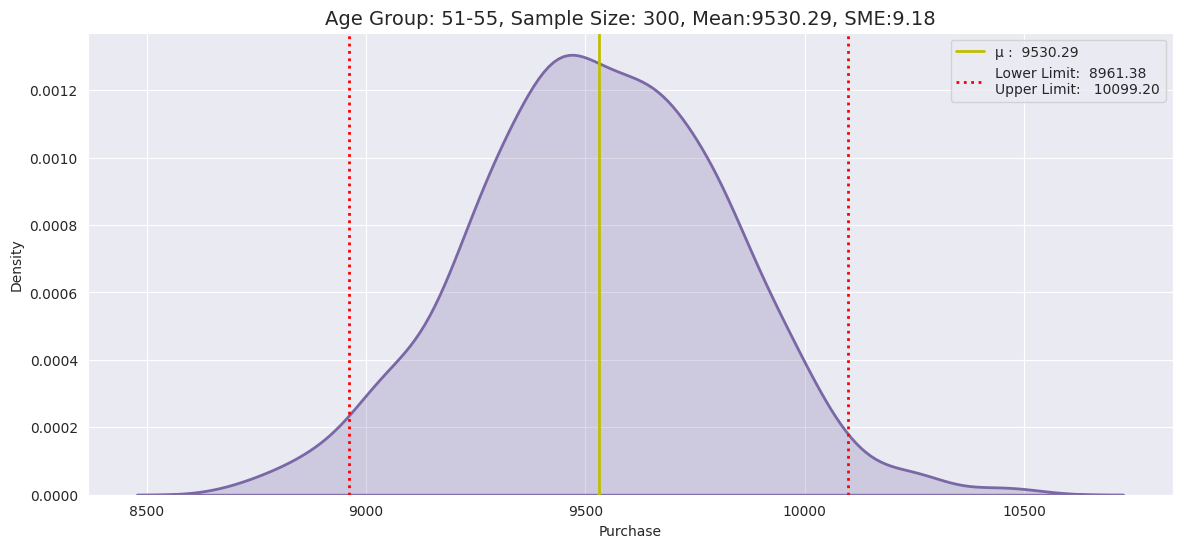

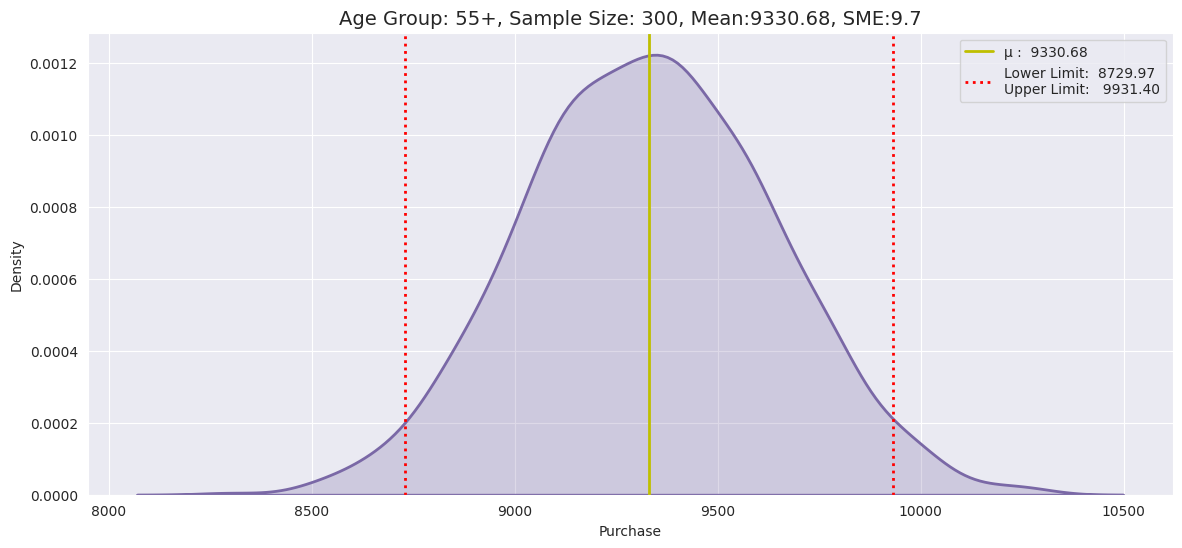

In [ ]:
ci = 95
itr_size = 1000
sample_size = 300
flag = 0
global age_group
age_group = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

res = pd.DataFrame(columns = ['Age_Group','Sample Size','Lower Limit','Upper Limit','Sample Mean','Confidence Interval','Interval Range','Range'])

for i in age_group:
    m_avg, ll, ul, mean = bootstrap_age(wm[wm['Age']==i]['Purchase'],sample_size,itr_size,ci)
    new_row = pd.DataFrame({'Age_Group':[i],'Sample Size':[sample_size],'Lower Limit':[ll],'Upper Limit':[ul],'Sample Mean':[mean],'Confidence Interval':[ci],'Interval Range':[[ll,ul]],'Range': [ul-ll]}) # Enclose single-value columns in lists to make their lengths consistent with 'Interval Range'
    res = pd.concat([res, new_row], ignore_index=True)
    #res = res.append({'Age_Group':i,'Sample Size':sample_size,'Lower Limit':ll,'Upper Limit':ul,'Sample Mean':mean,'Confidence Interval':ci,'Interval Range':[ll,ul],'Range': ul-ll}, ignore_index = True)

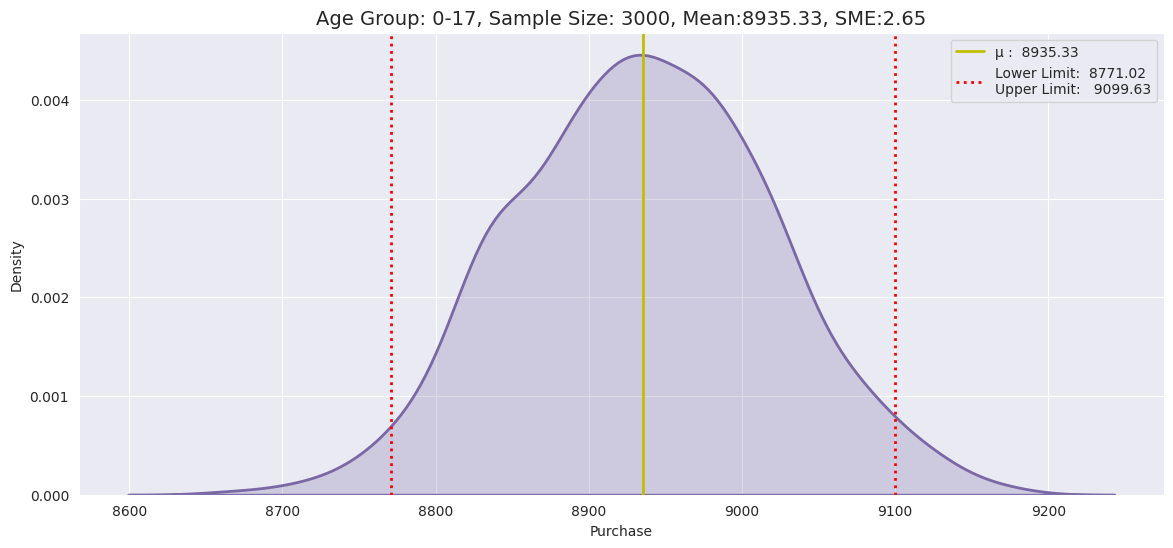

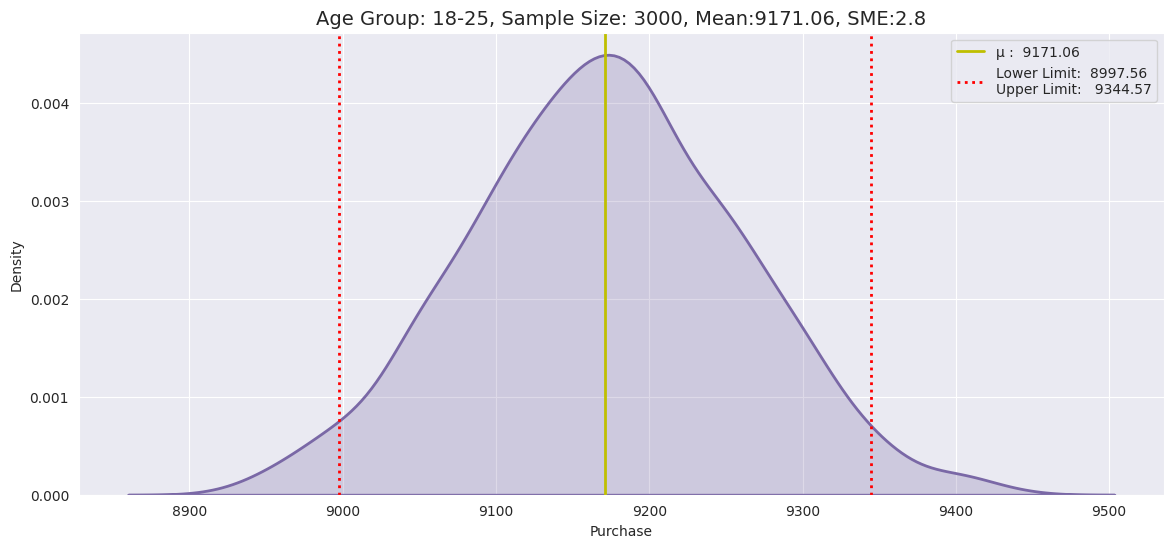

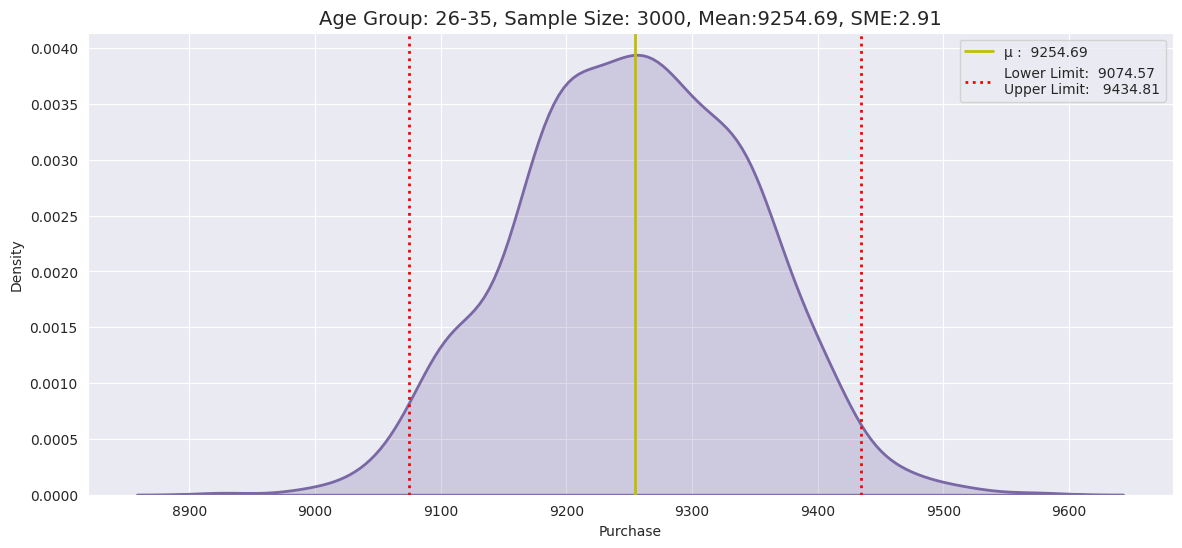

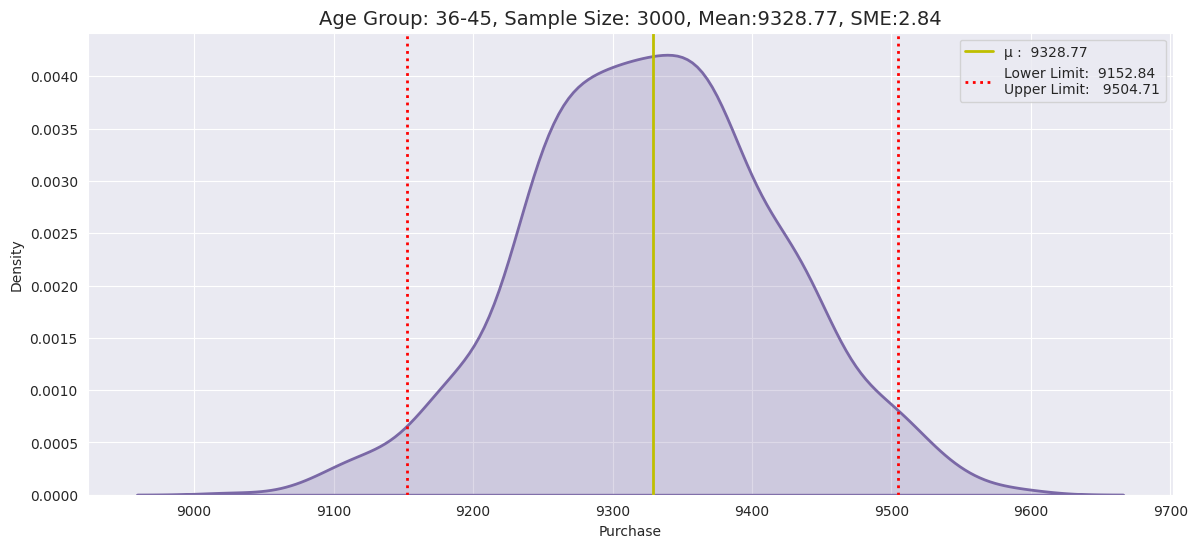

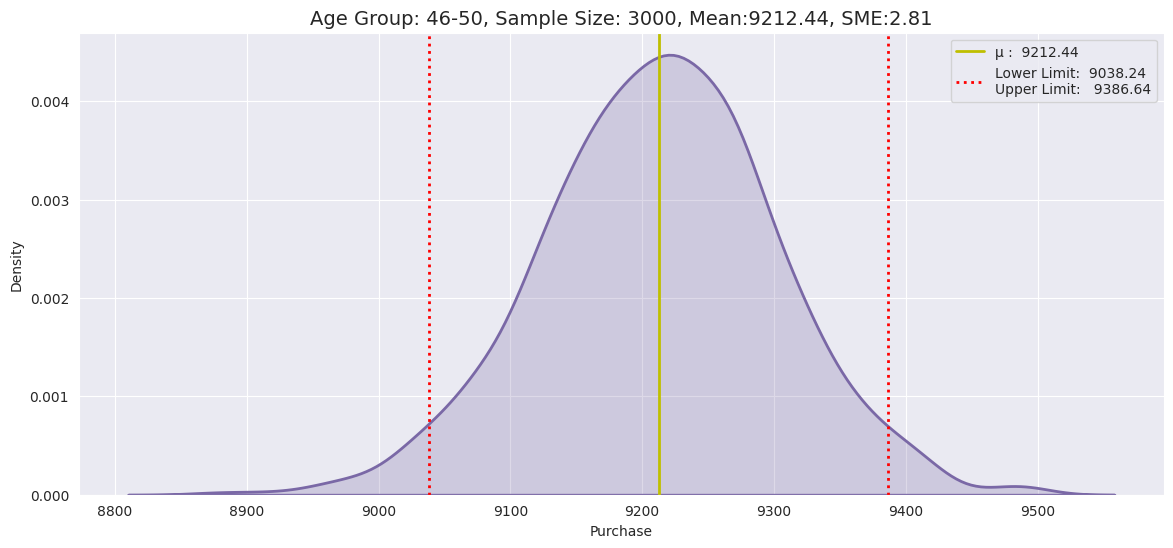

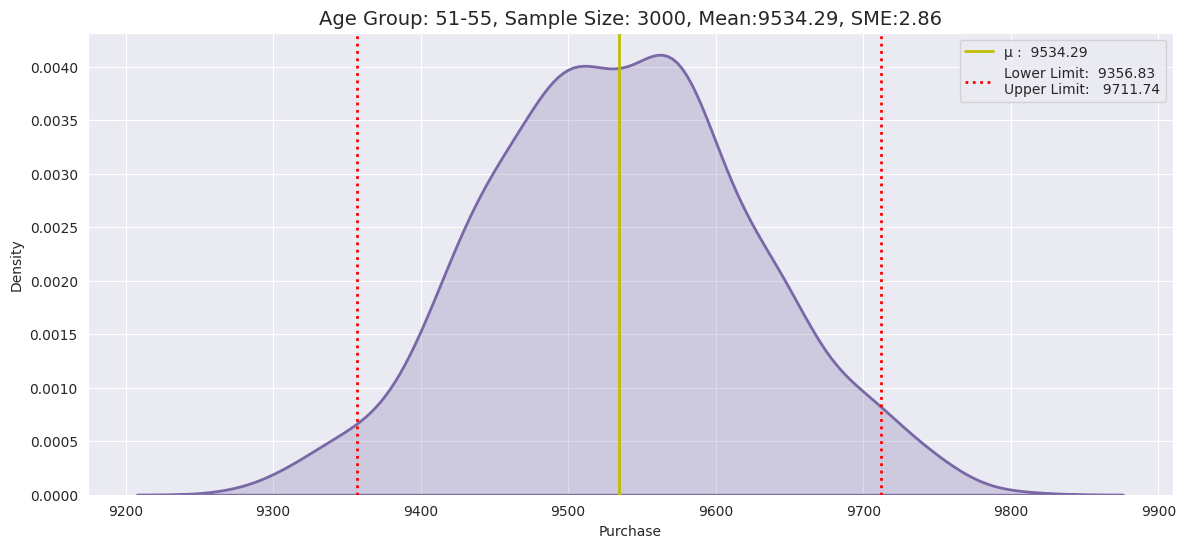

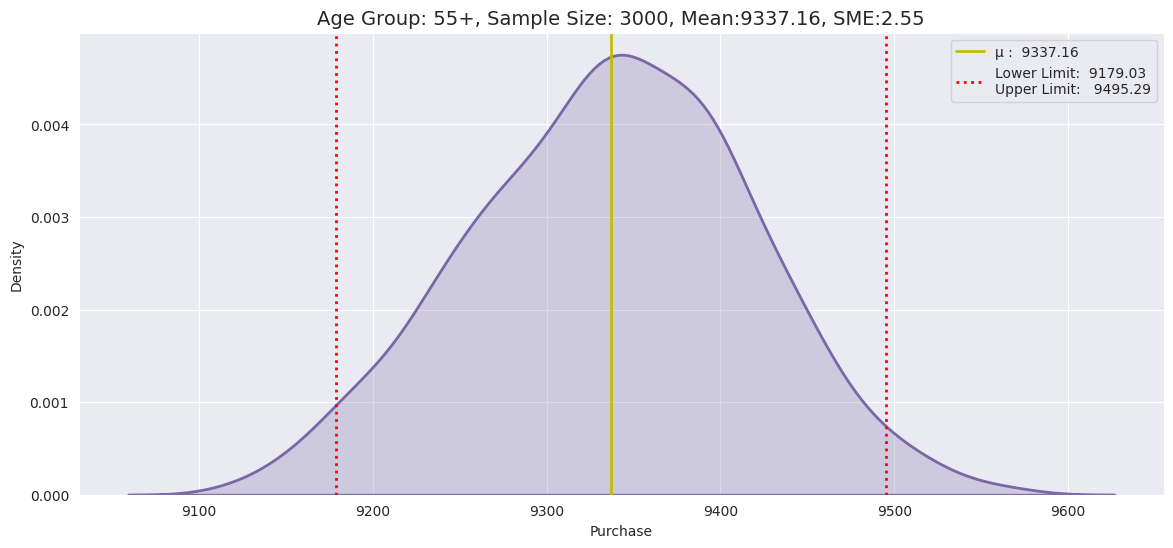

In [ ]:
ci = 95
itr_size = 1000
sample_size = 3000
flag = 0
global age_group
age_group = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

res = pd.DataFrame(columns = ['Age_Group','Sample Size','Lower Limit','Upper Limit','Sample Mean','Confidence Interval','Interval Range','Range'])

for i in age_group:
    m_avg, ll, ul, mean = bootstrap_age(wm[wm['Age']==i]['Purchase'],sample_size,itr_size,ci)
    new_row = pd.DataFrame({'Age_Group':[i],'Sample Size':[sample_size],'Lower Limit':[ll],'Upper Limit':[ul],'Sample Mean':[mean],'Confidence Interval':[ci],'Interval Range':[[ll,ul]],'Range': [ul-ll]}) # Enclose single-value columns in lists to make their lengths consistent with 'Interval Range'
    res = pd.concat([res, new_row], ignore_index=True)

 **Insights**
---

*Approximately 80% of users are aged 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45).

*75% of users are male, while 25% are female.

*60% of users are single, and 40% are married.

*35% have been staying in the city for 1 year, 18% for 2 years, and 17% for 3 years.

*There are 20 product categories.

*There are 20 different types of occupations in the city.

*The majority of users are male.

*There are 20 different types of occupations and product categories.

*Most users belong to City_Category B.

*There are more single users compared to married ones.

*Product categories 1, 5, 8, and 11 have the highest purchasing frequency.

*The average amount spent by male customers is 925,344.40.

*The average amount spent by female customers is 712,024.39.

---

**Confidence Intervals by Gender**

Using the Central Limit Theorem for the population:

*The average amount spent by male customers is 926,341.86.

*The average amount spent by female customers is 711,704.09.

*We can infer that, 95% of the time:

*The average amount spent by male customers will lie between 895,617.83 and 955,070.97.

*The average amount spent by female customers will lie between 673,254.77 and 750,794.02.

---

**Confidence Intervals by Marital Status**

Married confidence interval of means: 806,668.83 to 880,384.76.

Unmarried confidence interval of means: 848,741.18 to 912,410.38.

---

**Confidence Intervals by Age**

For age 26-35: confidence interval of means: 945,034.42 to 1,034,284.21.

For age 36-45: confidence interval of means: 823,347.80 to 935,983.62.

For age 18-25: confidence interval of means: 801,632.78 to 908,093.46.

For age 46-50: confidence interval of means: 713,505.63 to 871,591.93.

For age 51-55: confidence interval of means: 692,392.43 to 834,009.42.

For age 55+: confidence interval of means: 476,948.26 to 602,446.23.

For age 0-17: confidence interval of means: 527,662.46 to 710,073.17.

**Recommendations**

***1)Focus on Male Customers:*** Men spend more money than women, so the company should focus on retaining male customers and attracting more male customers.

***2)High-Purchase Product Categories:*** Product categories 1, 5, 8, and 11 have the highest purchasing frequency, indicating these are preferred by customers. The company should focus on selling more products in these categories or boosting sales of less purchased products.

***3)Target Unmarried Customers:*** Unmarried customers spend more than married ones, so the company should prioritize acquiring unmarried customers.

***4)Age Group Focus:*** Customers aged 18-45 spend more money than other age groups, so the company should aim to acquire more customers within this age range.

***5)City_Category C Focus:*** Male customers in City_Category C spend more than those in categories B or A. Increasing product sales in City_Category C can help boost the company’s revenue.